In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# loading data
data = np.loadtxt('data1.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
print(num_feature)
data = data.astype('float32')


(47, 3)
2


In [3]:
# data normalization
data_norm = data.copy()
maximum = np.max(data_norm,axis=0,keepdims=True)
print(maximum)
minimun = np.min(data_norm,axis=0,keepdims=True)
data_norm = (data_norm - minimun)/(maximum - minimun)
print(data_norm)

[[4.478e+03 5.000e+00 6.999e+05]]
[[0.34528404 0.5        0.43396226]
 [0.20628792 0.5        0.3018868 ]
 [0.42691672 0.5        0.3756604 ]
 [0.1555433  0.25       0.11716981]
 [0.59238833 0.75       0.6981132 ]
 [0.31246552 0.75       0.24528302]
 [0.18808605 0.5        0.2735849 ]
 [0.15857695 0.5        0.05490377]
 [0.145615   0.5        0.07943396]
 [0.1770546  0.5        0.13698113]
 [0.30005515 0.75       0.13226226]
 [0.31660232 0.5        0.33415094]
 [0.28626585 0.5        0.3020736 ]
 [1.         1.         1.        ]
 [0.11472698 0.5        0.16981132]
 [0.39933813 0.75       0.5283019 ]
 [0.12906784 0.25       0.24528302]
 [0.10590182 0.5        0.05660377]
 [0.484556   0.75       0.6228264 ]
 [0.60093766 0.75       0.80962265]
 [0.2523442  0.5        0.15660377]
 [0.2857143  0.25       0.16056603]
 [0.20739107 0.5        0.13773584]
 [0.30612245 0.75       0.16981132]
 [0.8378378  0.5        0.76226413]
 [0.06839493 0.5        0.1509434 ]
 [0.16712631 0.5        0.5558

In [4]:
# train val split
data_train, data_test = train_test_split(data_norm, test_size=0.3, random_state=42)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2]
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]

In [5]:
# model init
w = np.random.rand(num_feature+1,1)
print(w)

# gradient descent
def L2_loss(y_pred,y):
    return np.mean(np.square(y_pred-y))

iterations = 10000
lr = 0.1


[[0.58443592]
 [0.79814797]
 [0.11736793]]


In [6]:
log = []
for i in range(iterations):
    y_pred = np.matmul(X_train, w)
    term = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1)
    w -= term
    loss = L2_loss(y_pred,y_train)
    print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])

iter:0,loss:0.32167588542245895
iter:1,loss:0.26133909341115424
iter:2,loss:0.21664822453258464
iter:3,loss:0.18350665335441593
iter:4,loss:0.15889551171846658
iter:5,loss:0.14058941412644393
iter:6,loss:0.12694726988311672
iter:7,loss:0.11675833397676473
iter:8,loss:0.10912889733456788
iter:9,loss:0.10339887747555522
iter:10,loss:0.09908040993825057
iter:11,loss:0.09581262927314144
iter:12,loss:0.0933283644996579
iter:13,loss:0.09142960382352686
iter:14,loss:0.08996941453695778
iter:15,loss:0.08883861540257734
iter:16,loss:0.08795594857059919
iter:17,loss:0.0872608289422438
iter:18,loss:0.08670799230929696
iter:19,loss:0.08626354269280803
iter:20,loss:0.08590203108039615
iter:21,loss:0.08560429473058503
iter:22,loss:0.08535585757496277
iter:23,loss:0.08514574477256898
iter:24,loss:0.08496560313398593
iter:25,loss:0.08480904759714789
iter:26,loss:0.08467117489675241
iter:27,loss:0.08454820100613122
iter:28,loss:0.0844371903025084
iter:29,loss:0.0843358527864442
iter:30,loss:0.084242391

In [7]:
# normal eqution
term = np.matmul(X_train.T, X_train)
term_inv = np.linalg.inv(term)
w = np.matmul(np.matmul(term_inv,X_train.T),y_train.reshape(-1,1))
print(w)

[[ 0.89707607]
 [-0.02132246]
 [ 0.01620799]]


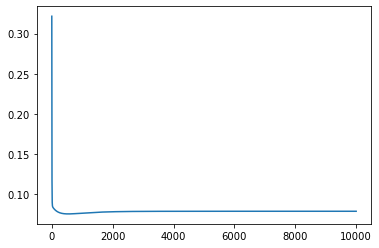

In [8]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

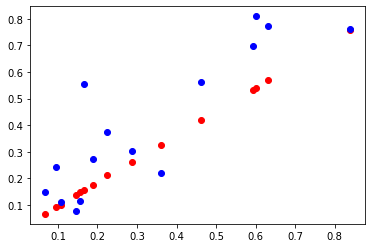

In [9]:
# visualization
y_pred = np.matmul(X_test, w)
plt.scatter(X_test[:,0],y_pred,c='r')
plt.scatter(X_test[:,0],y_test,c='b')

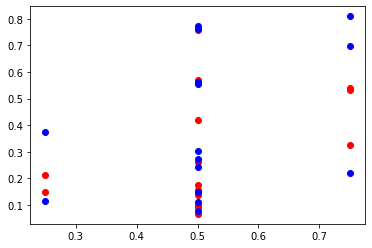

In [10]:
plt.scatter(X_test[:,1],y_pred,c='r')
plt.scatter(X_test[:,1],y_test,c='b')